# Fashion MNIST dataset

- Number of instance: 70000
- Data size: 28 x 28 = 784
- gray-scale from 0 to 255


### Import package, dataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

fmnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


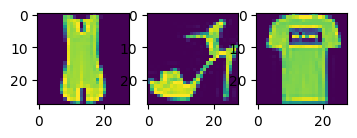

In [ ]:
plt.figure(figsize=(4, 4))

plt.subplot(2,3,1)
plt.imshow(x_train[4])

plt.subplot(2,3,2)
plt.imshow(x_train[9])

plt.subplot(2,3,3)
plt.imshow(x_train[1])

In [ ]:
# 0~255 값을 가진 이미지 데이터 0~1로 변환시켜주기
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

print(np.max(np.max(x_train_scaled)), np.min(np.min(x_train_scaled)))
print(np.max(np.max(x_test_scaled)), np.min(np.min(x_test_scaled)))

1.0 0.0
1.0 0.0


In [ ]:
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

print(x_train_scaled.shape)

(60000, 28, 28, 1)


In [ ]:
# one-hot encoding
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

print(y_train[0:5])
print(y_test_onehot[0:5])

[9 0 0 3 0]
[[0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


### keras sequential API

In [ ]:
from keras import layers, models
from keras.layers import Dropout

input_shape = (28, 28, 1)
cnn_seq = models.Sequential()

cnn_seq.add(layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape))
cnn_seq.add(layers.BatchNormalization())
cnn_seq.add(layers.Activation('relu'))
cnn_seq.add(layers.MaxPooling2D(2,2))

cnn_seq.add(layers.Conv2D(64, (3,3), padding='same'))
cnn_seq.add(layers.BatchNormalization())
cnn_seq.add(layers.Activation('relu'))
cnn_seq.add(layers.MaxPool2D((2,2)))

cnn_seq.add(layers.Flatten())
cnn_seq.add(layers.Dense(units=128, activation='relu'))
cnn_seq.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
cnn_seq.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)      

In [ ]:
history = cnn_seq.fit(x_train, y_train_onehot,
                      validation_data = [x_test_scaled, y_test_onehot], epochs=20)

Epoch 1/20
1875/1875 [==============================] - 125s 65ms/step - loss: 0.3880 - accuracy: 0.8615 - val_loss: 3.0222 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2603 - accuracy: 0.9050 - val_loss: 3.0667 - val_accuracy: 0.1243
Epoch 3/20
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2194 - accuracy: 0.9198 - val_loss: 4.6630 - val_accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 119s 64ms/step - loss: 0.1900 - accuracy: 0.9293 - val_loss: 3.1920 - val_accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 129s 69ms/step - loss: 0.1645 - accuracy: 0.9389 - val_loss: 3.3309 - val_accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 119s 63ms/step - loss: 0.1441 - accuracy: 0.9456 - val_loss: 3.5831 - val_accuracy: 0.1000
Epoch 7/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1259 - accuracy: 0.9533 - val_loss: 3

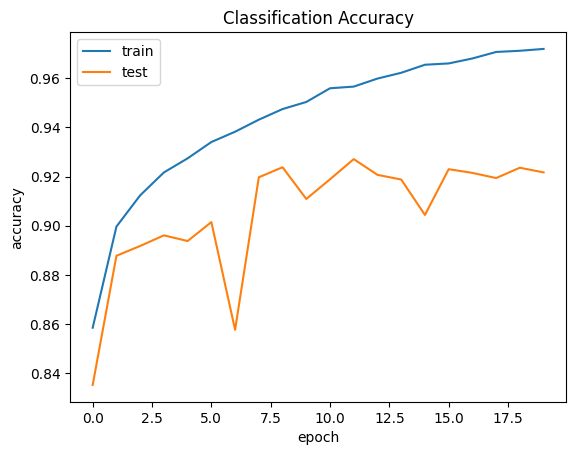

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

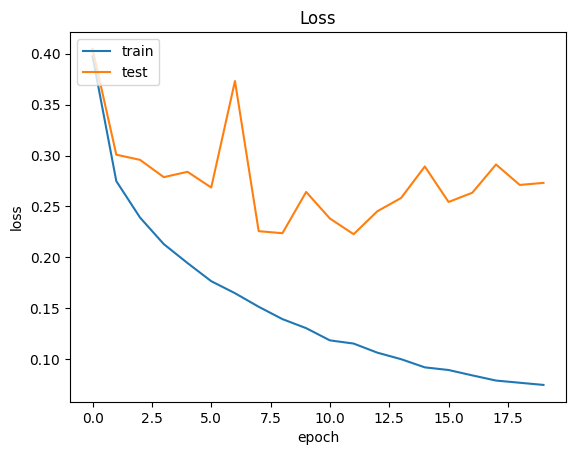

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Keras functional API

In [ ]:
input_shape = (28, 28, 1)

input = layers.Input(shape=input_shape)
conv1_1 = layers.Conv2D(32, (3,3), padding='same')(input)
conv1_2 = layers.BatchNormalization()(conv1_1)
conv1_3 = layers.Activation('relu')(conv1_2)
conv1_4 = layers.MaxPooling2D((2,2))(conv1_3)

conv2_1 = layers.Conv2D(64, (3,3), padding='same')(conv1_4)
conv2_2 = layers.BatchNormalization()(conv2_1)
conv2_3 = layers.Activation('relu')(conv2_2)
conv2_4 = layers.Dropout(0.25)(conv2_3)
conv2_5 = layers.MaxPooling2D((2,2))(conv2_4)

flattend = layers.Flatten()(conv2_5)
dense = layers.Dense(128, activation='relu')(flattend)
output = layers.Dense(10, activation='softmax')(dense)

cnn_func = models.Model(input, output)

In [ ]:
cnn_func.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_func.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        1849

In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [ ]:
history = cnn_func.fit(x_train_scaled, y_train_onehot,
                       validation_data = [x_test_scaled, y_test_onehot], epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 141s 74ms/step - loss: 0.4054 - accuracy: 0.8546 - val_loss: 0.3274 - val_accuracy: 0.8852
Epoch 2/20
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2741 - accuracy: 0.8995 - val_loss: 0.3005 - val_accuracy: 0.8938
Epoch 3/20
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2347 - accuracy: 0.9140 - val_loss: 0.3079 - val_accuracy: 0.8859
Epoch 4/20
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2100 - accuracy: 0.9220 - val_loss: 0.2784 - val_accuracy: 0.8990
Epoch 5/20
1875/1875 [==============================] - 132s 71ms/step - loss: 0.1889 - accuracy: 0.9301 - val_loss: 0.2337 - val_accuracy: 0.9138
Epoch 6/20
1875/1875 [==============================] - 132s 70ms/step - loss: 0.1724 - accuracy: 0.9359 - val_loss: 0.2487 - val_accuracy: 0.9099
Epoch 7/20
1875/1875 [==============================] - 133s 71ms/step - loss: 0.1580 - accuracy: 0.9406 - val_loss: 0

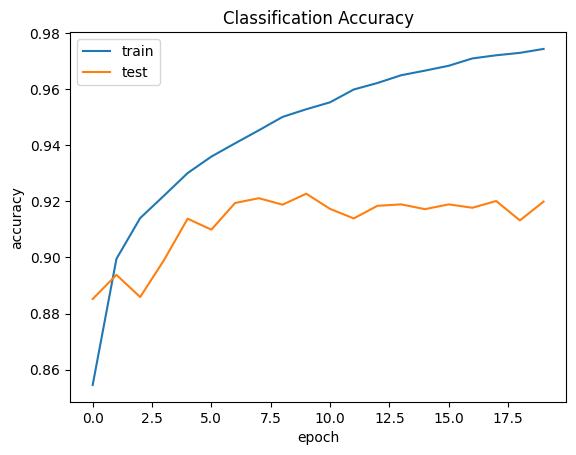

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

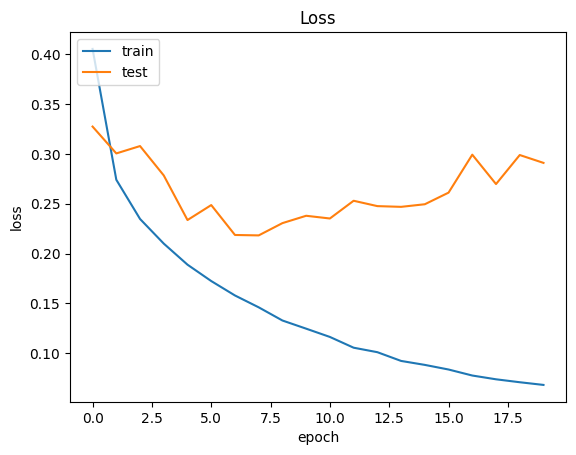

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CIFAR-10 dataset

- Number of instances: 60000
- Data size: 32 x 32 x 3
- Data granularity: from 0 to 255 for 3 channels

### Import package, dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


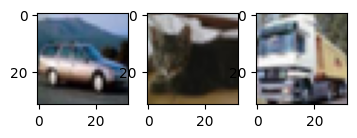

In [8]:
plt.figure(figsize=(4, 4))

plt.subplot(2,3,1)
plt.imshow(x_train[4])

plt.subplot(2,3,2)
plt.imshow(x_train[9])

plt.subplot(2,3,3)
plt.imshow(x_train[1])

### Data preprocessing

In [9]:
from sklearn.preprocessing import LabelBinarizer

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

## Transfer model

- with pretrained ResNet50 model
- with own freezing point / FC layers

In [2]:
from keras.applications import ResNet50

base_model = ResNet50(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [10]:
transfer_model = keras.Sequential([base_model, layers.Flatten(), layers.Dense(10, activation='softmax')])
transfer_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onhot = encoder.fit_transform(y_test)

In [ ]:
history = transfer_model.fit(x_train_scaled, y_train_onehot,
                             validation_data=[x_test_scaled, y_test_onehot], epochs=200)

Epoch 1/200
1563/1563 [==============================] - 45s 21ms/step - loss: 2.0783 - accuracy: 0.2435 - val_loss: 1.9521 - val_accuracy: 0.2983
Epoch 2/200
1563/1563 [==============================] - 25s 16ms/step - loss: 1.9187 - accuracy: 0.3104 - val_loss: 1.8987 - val_accuracy: 0.3130
Epoch 3/200
1563/1563 [==============================] - 25s 16ms/step - loss: 1.8636 - accuracy: 0.3345 - val_loss: 1.8091 - val_accuracy: 0.3541
Epoch 4/200
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8300 - accuracy: 0.3472 - val_loss: 1.8433 - val_accuracy: 0.3345
Epoch 5/200
1563/1563 [==============================] - 24s 16ms/step - loss: 1.8022 - accuracy: 0.3567 - val_loss: 1.7600 - val_accuracy: 0.3916
Epoch 6/200
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7798 - accuracy: 0.3668 - val_loss: 1.7676 - val_accuracy: 0.3774
Epoch 7/200
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7672 - accuracy: 0.3719 - val_loss: 1

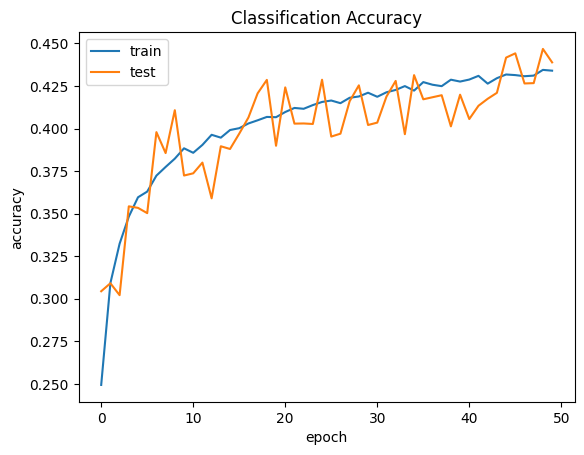

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

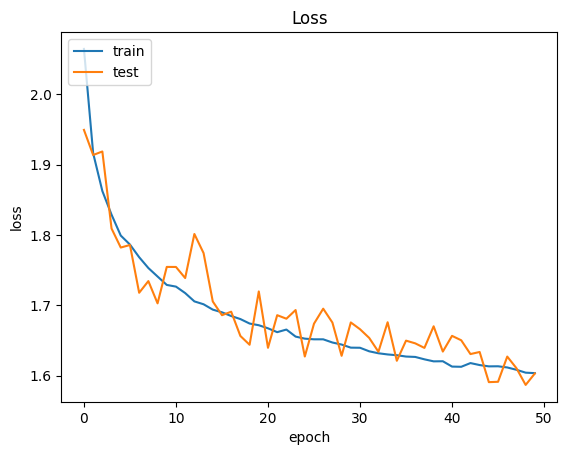

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# transfer_model = models.Sequential()
# transfer_model.add(base_model)
# transfer_model.add(layers.Flatten())
# transfer_model.add(layers.Dense(256, activation='relu'))
# transfer_model.add(layers.Dense(10, activation='softmax'))

# transfer_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# transfer_model.summary()

## ResNet

### Identity block

In [ ]:
def res_identify(input, filters):
  x_skip = input
  f1, f2 = filters

  x = layers.Conv2D(f1, kernel_size=(1,1), strides=(1,1), padding='valid')(input)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(f1, kernel_size=(3,3), strides=(1,1), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(f2, kernel_size=(1,1), strides=(1,1), padding='valid')(x)
  x = layers.BatchNormalization()(x)

  x = layers.Add()([x, x_skip])
  x = layers.Activation('relu')(x)

  return x

### Convloution block

In [ ]:
def res_conv(input, stride, filters):
  x_skip = input
  s = stride
  f1, f2 = filters

  x = layers.Conv2D(f1, kernel_size=(1,1), strides=(s,s), padding='valid')(input)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(f1, kernel_size=(3,3), strides=(1,1), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(f2, kernel_size=(1,1), strides=(1,1), padding='valid')(x)
  x = layers.BatchNormalization()(x)

  x_skip = layers.Conv2D(f2, kernel_size=(1,1), strides=(s,s), padding='valid')(x_skip)
  x_skip = layers.BatchNormalization()(x_skip)

  x = layers.Add()([x, x_skip])
  x = layers.Activation('relu')(x)

  return x

In [ ]:
def resnet_50():
  input = layers.Input(shape=(x_train_scaled.shape[1], x_train_scaled.shape[2], x_train_scaled.shape[3]))
  x = layers.ZeroPadding2D(padding=(3,3))(input)

  x = layers.Conv2D(64, kernel_size=(7,7), strides=(2,2))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D((3,3), strides=(2,2))(x)

  x = res_conv(x, stride=1, filters=(64, 256))
  x = res_identify(x, filters=(65, 256))
  x = res_identify(x, filters=(65, 256))
  
  x = res_conv(x, stride=2, filters=(128, 512))
  x = res_identify(x, filters=(128, 512))
  x = res_identify(x, filters=(128, 512))
  x = res_identify(x, filters=(128, 512))

  x = res_conv(x, stride=2, filters=(256, 1024))
  x = res_identify(x, filters=(256, 1024))
  x = res_identify(x, filters=(256, 1024))
  x = res_identify(x, filters=(256, 1024))
  x = res_identify(x, filters=(256, 1024))
  x = res_identify(x, filters=(256, 1024))

  x = res_conv(x, stride=2, filters=(512, 2048))
  x = res_identify(x, filters=(512, 2048))
  x = res_identify(x, filters=(512, 2048))

  x = layers.AveragePooling2D((2, 2), padding='same')(x)
  x = layers.Flatten()(x)
  output = layers.Dense(y_train_onehot.shape[1], activation='softmax', kernel_initializer='he_normal')(x)

  model = models.Model(inputs=input, outputs=output)

  return model

In [ ]:
ResNet50 = resnet_50()
ResNet50.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
ResNet50.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 38, 38, 3)   0           ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_59 (Conv2D)             (None, 16, 16, 64)   9472        ['zero_padding2d_2[0][0]']       
                                                                                                  
 batch_normalization_59 (BatchN  (None, 16, 16, 64)  256         ['conv2d_59[0][0]']        

### Model Fitting

In [ ]:
history = ResNet50.fit(x_train_scaled, y_train_onehot,
                       validation_data = [x_test_scaled, y_test_onehot], epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 3989s 3s/step - loss: 2.1051 - accuracy: 0.3523 - val_loss: 2.6654 - val_accuracy: 0.1350
Epoch 2/20
 957/1563 [=================>............] - ETA: 24:56 - loss: 2.2182 - accuracy: 0.3336